In [14]:
import json
import findspark
import pandas as pd
import numpy as np
from enum import Enum
findspark.init()


import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()



#choose path to your file
files = ['Lina/0.json','Lina/1.json','Lina/2.json','Lina/3.json']

df = spark.read.option("multiLine", True).json(files)
df = df.toPandas()


In [4]:
dfForAllTimeArtist = df.copy(deep=True)
dfForAllTimeArtist['time_listened_by_artist'] = dfForAllTimeArtist.groupby(artistName)[TimePlayed].transform('sum')/1000/60/60
dfForAllTimeArtist = dfForAllTimeArtist.drop(columns = [trackName,TimePlayed,'master_metadata_album_album_name'])
dfForAllTimeArtist = dfForAllTimeArtist.drop_duplicates(artistName)
dfForAllTimeArtist.sort_values('time_listened_by_artist', inplace=True, ascending=False)
display(dfForAllTimeArtist)
dfForAllTimeArtist.to_csv('sortbyTimeForArtist.csv')

NameError: name 'df' is not defined

In [15]:
hours_listened_in_day = np.zeros(24)

In [16]:
total= 0
for index, row in df.iterrows():
    time = int(row['ts'][11:13])
    timee = int(row['ms_played'])
    hours_listened_in_day[time]+= timee
    total+=timee

hours_listened_in_day = hours_listened_in_day / 1000 /60 / 60
print(total/ 1000 /60 / 60)

980.598531111111


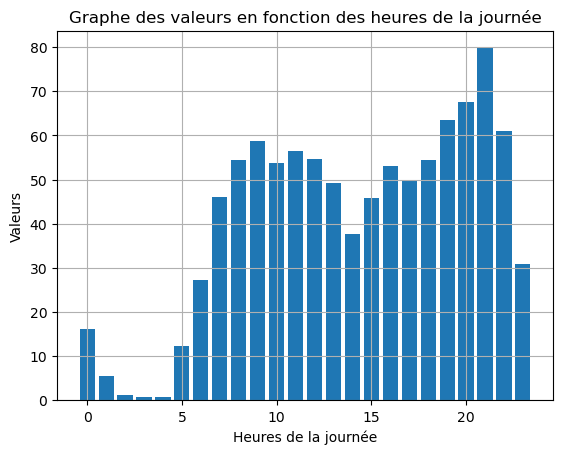

In [17]:
import matplotlib.pyplot as plt
   
heures = np.arange(24)

plt.bar(heures, hours_listened_in_day)
plt.xlabel('Heures de la journée')
plt.ylabel('Valeurs')
plt.title('Graphe des valeurs en fonction des heures de la journée')
plt.grid(True)
plt.show()

In [5]:
import json
import findspark
import pandas as pd
import numpy as np
from enum import Enum
findspark.init()


import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

SPOTIFYFULL = ['ms_played','master_metadata_track_name','master_metadata_track_name','ts',"conn_country","episode_name",'episode_show_name','offline_timestamp','incognito_mode','ip_addr_decrypted','offline','platform','reason_end','reason_start','shuffle','skipped','spotify_episode_uri','spotify_track_uri','user_agent_decrypted','username']
SPOTIFYSHORT = ["msPlayed","artistName","trackName","endTime"]
YTMUSIC = ['titleUrl', 'title','time','header','products','subtitles','activityControls']

YTM = "YTMUSIC"
SPOF = "SPOTIFYFULL"
SPOS = "SPOTIFYSHORT"

class PlatformSpecs(Enum):
    SPOTIFYFULL = 1
    SPOTIFYSHORT = 2
    YTMUSIC = 3

#choose path to your file
files = ['Cycy/0.json']

#read file.json and put it to pandas dataframe
df = spark.read.option("multiLine", True).json(files)
df = df.toPandas()

class Platform:
    
    def __init__(self, platform):
        self.platform = platform
        self.useFullCols=[]
        self.cols=[]

    def topTracksByTime(self):
        raise NotImplementedError("common_function() must be implemented in the derived class.")
        


class SpotifyFull(Platform):
    
    def __init__(self, additional_variable):
        self.useFullCols = ['ms_played','master_metadata_track_name','master_metadata_track_name','ts']
        self.cols = SPOTIFYFULL
        df = df[self.usefullCols]
        self.dfForAllTimeSongs = df.copy(deep=True)
        
    def topTracks(self):
        self.dfForAllTimeSongs['frequency'] = dfForAllTimeSongs.groupby(trackName)[trackName].transform('count')
        self.dfForAllTimeSongs['time_listened'] = dfForAllTimeSongs.groupby(trackName)[timePlayed].transform('sum')/1000/60/60
        self.dfForAllTimeSongs = dfForAllTimeSongs.drop_duplicates(trackName)
        self.dfForAllTimeSongs['time_listened'] = self.dfForAllTimeSongs['time_listened']/1000/60/60
        self.dfForAllTimeSongs.sort_values('time_listened', inplace = True, ascending = False)
        display(dfForAllTimeSongs)
        self.dfForAllTimeSongs.to_csv('sortbyTimeForEachTrack.csv')
        
class SpotifyShort(SpotifyFull):
    
    def __init__(self):
        self.useFullCols = ["msPlayed","trackName","artistName"]
        self.cols = SPOTIFYSHORT
        
    def topTracks(self):
    

class YtMusic(Platform):
    
    def __init__(self, platform, additional_variable):
        super().__init__(platform)
        
        if (isinstance(platform, Platform) and platform.name == YTM):
            self.useFullCols = 
            self.cols = 
        else raise CustomException("Wrong Platform")

    def topTracks(self):
    


# Create platform instance
platform_a = PlatformA("Value 1 for Platform A", "Value 2 for Platform A", "Additional Value for Platform A")

# Call the common function on platform instance
platform_a.common_function()











def topTracks(platform):
    usefullCols = []
    trackName = ""
    timePlayed = ""

    if (isinstance(platform, Platform)):
        if (platform.name == SPOF):
        
            timePlayed = usefullCols[0]
            trackName = usefullCols[1]
            df[timePlayed] = pd.to_numeric(df[timePlayed], errors='coerce').astype('Int64').fillna(0)
        else if (platform.name == SPOS):
            usefullCols = ["msPlayed","trackName","artistName"]
            timePlayed = usefullCols[0]
            trackName = usefullCols[1]
            df[timePlayed] = pd.to_numeric(df[timePlayed], errors='coerce').astype('Int64').fillna(0)
        else if (platform.name == YTM):
            usefullCols = ['titleUrl', 'title','time']
            trackName = usefullCols[0]
        else:
            raise CustomException("Monvier essaye de mettre des bonnes data")
    else:
        raise CustomException("Monvier essaye de mettre des bonnes data")      

        
        
        



SyntaxError: invalid syntax (3217037510.py, line 14)